In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from src.experiment_utils import run_simulated_experiments, run_resampling_experiments, run_error_decomp_experiments

In [3]:
import warnings
warnings.filterwarnings("ignore")

# Section 3

## Section 3.1.1

In [4]:
# num features experiment
features = [1., .8, .6, .4, .2]

In [5]:
configs=[{'bootstrap': False, 'n_estimators': 50, 'max_leaf_nodes':500, 'max_features': x} for x in features]

res = run_simulated_experiments('vary_features', configs, n_reps=3)

Running forest experiment with seed 1, n_estimators 50, max features 1, bootstrap False and max_leaf_nodes 500.


Running forest experiment with seed 1, n_estimators 50, max features 0.8, bootstrap False and max_leaf_nodes 500.
Running forest experiment with seed 1, n_estimators 50, max features 0.6, bootstrap False and max_leaf_nodes 500.
Running forest experiment with seed 1, n_estimators 50, max features 0.4, bootstrap False and max_leaf_nodes 500.
Running forest experiment with seed 1, n_estimators 50, max features 0.2, bootstrap False and max_leaf_nodes 500.
Running forest experiment with seed 2, n_estimators 50, max features 1, bootstrap False and max_leaf_nodes 500.
Running forest experiment with seed 2, n_estimators 50, max features 0.8, bootstrap False and max_leaf_nodes 500.
Running forest experiment with seed 2, n_estimators 50, max features 0.6, bootstrap False and max_leaf_nodes 500.
Running forest experiment with seed 2, n_estimators 50, max features 0.4, bootstrap False and max_leaf_nodes 500.
Running forest experiment with seed 2, n_estimators 50, max features 0.2, bootstrap False 

Text(0.5, 1.0, 'MSE Test')

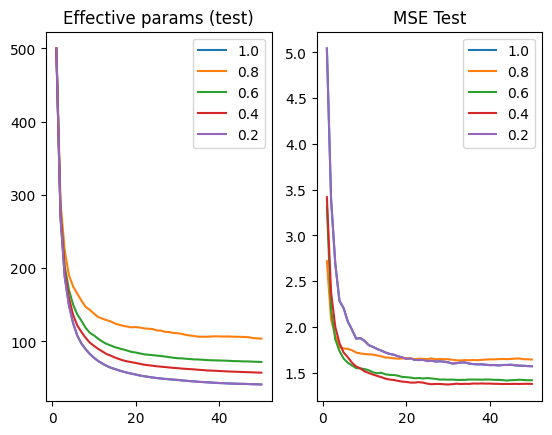

In [8]:
res_mean = res.groupby(['max_features', 'n_estimators'])[['mse_test', 'ep_train', 'ep_test']].mean().reset_index()
plt.subplot(1, 2, 1)
for f in features:
    res_sel = res_mean[res_mean['max_features']==f]
    plt.plot(res_sel['n_estimators'], res_sel['ep_test'], label=f'{f}')
plt.legend()
plt.title('Effective params (test)')

plt.subplot(1, 2, 2)
for f in features:
    res_sel = res_mean[res_mean['max_features']==f]
    plt.plot(res_sel['n_estimators'], res_sel['mse_test'], label=f'{f}')
plt.legend()
plt.title('MSE Test')

## Section 3.1.2

In [10]:
depths = [500, 200, 100, 50]

In [11]:
configs=[{'bootstrap': False, 'n_estimators': 50, 'max_leaf_nodes':x, 'max_features': 1/3} for x in depths]

res = run_simulated_experiments('vary_depths', configs, n_reps=3)

Running forest experiment with seed 1, n_estimators 50, max features 0.3333333333333333, bootstrap False and max_leaf_nodes 500.


Running forest experiment with seed 1, n_estimators 50, max features 0.3333333333333333, bootstrap False and max_leaf_nodes 200.
Running forest experiment with seed 1, n_estimators 50, max features 0.3333333333333333, bootstrap False and max_leaf_nodes 100.
Running forest experiment with seed 1, n_estimators 50, max features 0.3333333333333333, bootstrap False and max_leaf_nodes 50.
Running forest experiment with seed 2, n_estimators 50, max features 0.3333333333333333, bootstrap False and max_leaf_nodes 500.
Running forest experiment with seed 2, n_estimators 50, max features 0.3333333333333333, bootstrap False and max_leaf_nodes 200.
Running forest experiment with seed 2, n_estimators 50, max features 0.3333333333333333, bootstrap False and max_leaf_nodes 100.
Running forest experiment with seed 2, n_estimators 50, max features 0.3333333333333333, bootstrap False and max_leaf_nodes 50.
Running forest experiment with seed 3, n_estimators 50, max features 0.3333333333333333, bootstrap 

Text(0.5, 1.0, 'MSE Test')

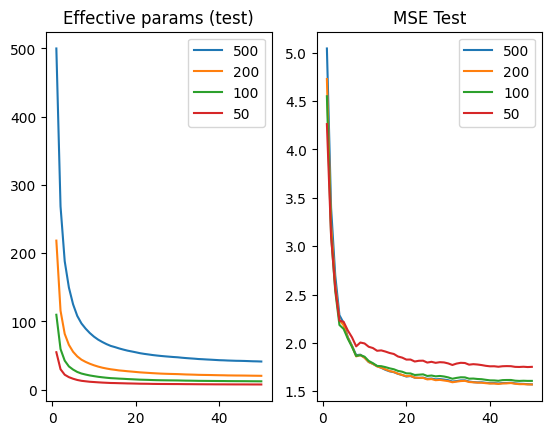

In [13]:
res_mean = res.groupby(['max_leaf_nodes', 'n_estimators'])[['mse_test', 'ep_train', 'ep_test']].mean().reset_index()
plt.subplot(1, 2, 1)
for d in depths:
    res_sel = res_mean[res_mean['max_leaf_nodes']==d]
    plt.plot(res_sel['n_estimators'], res_sel['ep_test'], label=f'{d}')
plt.legend()
plt.title('Effective params (test)')

plt.subplot(1, 2, 2)
for d in depths:
    res_sel = res_mean[res_mean['max_leaf_nodes']==d]
    plt.plot(res_sel['n_estimators'], res_sel['mse_test'], label=f'{d}')
plt.legend()
plt.title('MSE Test')

In [14]:
depths = [500, 50, 20, 2]

In [17]:
configs=[{ 'n_estimators': 500, 'max_leaf_nodes':x, 'learning_rate': .05} for x in depths]

res = run_simulated_experiments('vary_depths', configs, n_reps=3, boosting=True)

Running boosting experiment with seed 1, n_estimators 500, learning rate 0.05 and max_leaf_nodes 500.


Running boosting experiment with seed 1, n_estimators 500, learning rate 0.05 and max_leaf_nodes 50.
Running boosting experiment with seed 1, n_estimators 500, learning rate 0.05 and max_leaf_nodes 20.
Running boosting experiment with seed 1, n_estimators 500, learning rate 0.05 and max_leaf_nodes 2.
Running boosting experiment with seed 2, n_estimators 500, learning rate 0.05 and max_leaf_nodes 500.
Running boosting experiment with seed 2, n_estimators 500, learning rate 0.05 and max_leaf_nodes 50.
Running boosting experiment with seed 2, n_estimators 500, learning rate 0.05 and max_leaf_nodes 20.
Running boosting experiment with seed 2, n_estimators 500, learning rate 0.05 and max_leaf_nodes 2.
Running boosting experiment with seed 3, n_estimators 500, learning rate 0.05 and max_leaf_nodes 500.
Running boosting experiment with seed 3, n_estimators 500, learning rate 0.05 and max_leaf_nodes 50.
Running boosting experiment with seed 3, n_estimators 500, learning rate 0.05 and max_leaf_

Text(0.5, 1.0, 'MSE Test')

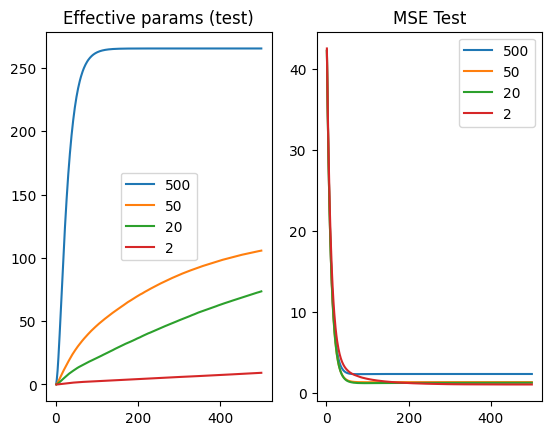

In [18]:
res_mean = res.groupby(['max_leaf_nodes', 'n_estimators'])[['mse_test', 'ep_train', 'ep_test']].mean().reset_index()
plt.subplot(1, 2, 1)
for d in depths:
    res_sel = res_mean[res_mean['max_leaf_nodes']==d]
    plt.plot(res_sel['n_estimators'], res_sel['ep_test'], label=f'{d}')
plt.legend()
plt.title('Effective params (test)')

plt.subplot(1, 2, 2)
for d in depths:
    res_sel = res_mean[res_mean['max_leaf_nodes']==d]
    plt.plot(res_sel['n_estimators'], res_sel['mse_test'], label=f'{d}')
plt.legend()
plt.title('MSE Test')

## Section 3.2 

In [7]:
# resampling experiment (degrees of freedom)
configs=[{'bootstrap': False, 'n_estimators': 50, 'max_leaf_nodes':500, 'max_features': x} for x in features] + [{'bootstrap': True, 'n_estimators': 50, 'max_leaf_nodes':500, 'max_features': x} for x in features] + [{'bootstrap': True, 'n_estimators': 50, 'max_leaf_nodes':50, 'max_features': x} for x in features]
res_resamp=run_resampling_experiments('res_resamp', configs, n_reps=50, n_seeds=3)

Running 50 experiment with seed 1, bootstrap False, n_estimators 50, max_features 1.0 and max_leaf_nodes 500.


Running 50 experiment with seed 1, bootstrap False, n_estimators 50, max_features 0.8 and max_leaf_nodes 500.
Running 50 experiment with seed 1, bootstrap False, n_estimators 50, max_features 0.6 and max_leaf_nodes 500.
Running 50 experiment with seed 1, bootstrap False, n_estimators 50, max_features 0.4 and max_leaf_nodes 500.
Running 50 experiment with seed 1, bootstrap False, n_estimators 50, max_features 0.2 and max_leaf_nodes 500.
Running 50 experiment with seed 1, bootstrap True, n_estimators 50, max_features 1.0 and max_leaf_nodes 500.
Running 50 experiment with seed 1, bootstrap True, n_estimators 50, max_features 0.8 and max_leaf_nodes 500.
Running 50 experiment with seed 1, bootstrap True, n_estimators 50, max_features 0.6 and max_leaf_nodes 500.
Running 50 experiment with seed 1, bootstrap True, n_estimators 50, max_features 0.4 and max_leaf_nodes 500.
Running 50 experiment with seed 1, bootstrap True, n_estimators 50, max_features 0.2 and max_leaf_nodes 500.
Running 50 expe

Text(0.5, 1.0, 'EP test')

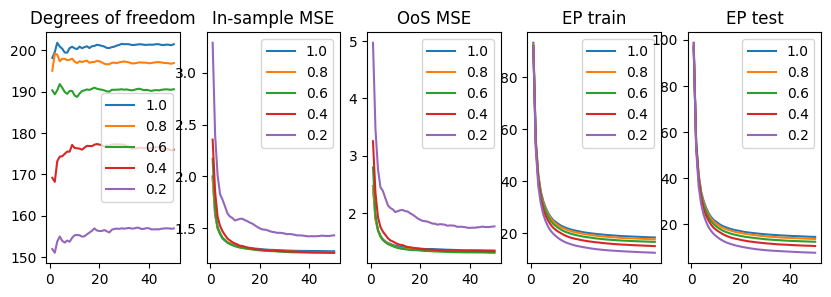

In [15]:
res_mean = res_resamp.groupby(['max_leaf_nodes', 'n_estimators', 'max_features', 'bootstrap'])[['mse_test', 'mse_train_resamp', 'dof', 'ep_train', 'ep_test']].mean().reset_index()

# select one set of the results
bootstrap_sel = True
leaf_nodes_sel = 50

res_mean_sel = res_mean[(res_mean['bootstrap'] == bootstrap_sel) & (res_mean['max_leaf_nodes'] == leaf_nodes_sel)]

plt.figure(figsize=(10, 3))
plt.subplot(1, 5, 1)
for f in features:
    res_sel = res_mean_sel[res_mean_sel['max_features']==f]
    plt.plot(res_sel['n_estimators'], res_sel['dof'], label=f'{f}')
plt.legend()
plt.title('Degrees of freedom')

plt.subplot(1, 5, 2)
for f in features:
    res_sel = res_mean_sel[res_mean_sel['max_features']==f]
    plt.plot(res_sel['n_estimators'], res_sel['mse_train_resamp'], label=f'{f}')
plt.legend()
plt.title('In-sample MSE')

plt.subplot(1, 5, 3)
for f in features:
    res_sel = res_mean_sel[res_mean_sel['max_features']==f]
    plt.plot(res_sel['n_estimators'], res_sel['mse_test'], label=f'{f}')
plt.legend()
plt.title('OoS MSE')


plt.subplot(1, 5, 4)
for f in features:
    res_sel = res_mean_sel[res_mean_sel['max_features']==f]
    plt.plot(res_sel['n_estimators'], res_sel['ep_train'], label=f'{f}')
plt.legend()
plt.title('EP train')

plt.subplot(1, 5, 5)
for f in features:
    res_sel = res_mean_sel[res_mean_sel['max_features']==f]
    plt.plot(res_sel['n_estimators'], res_sel['ep_test'], label=f'{f}')
plt.legend()
plt.title('EP test')


## Section 3.3

In [18]:
# effect of boostrapping (Fig 7)
configs = [{'bootstrap': True, 'n_estimators': 50, 'max_leaf_nodes':500, 'max_features': 1/3},
            {'bootstrap': False, 'n_estimators': 50, 'max_leaf_nodes':500, 'max_features': 1/3}]
res = run_simulated_experiments('bootstrap_effect', configs, n_reps=3)

Running forest experiment with seed 1, n_estimators 50, max features 0.3333333333333333, bootstrap True and max_leaf_nodes 500.
Running forest experiment with seed 1, n_estimators 50, max features 0.3333333333333333, bootstrap False and max_leaf_nodes 500.
Running forest experiment with seed 2, n_estimators 50, max features 0.3333333333333333, bootstrap True and max_leaf_nodes 500.
Running forest experiment with seed 2, n_estimators 50, max features 0.3333333333333333, bootstrap False and max_leaf_nodes 500.
Running forest experiment with seed 3, n_estimators 50, max features 0.3333333333333333, bootstrap True and max_leaf_nodes 500.
Running forest experiment with seed 3, n_estimators 50, max features 0.3333333333333333, bootstrap False and max_leaf_nodes 500.


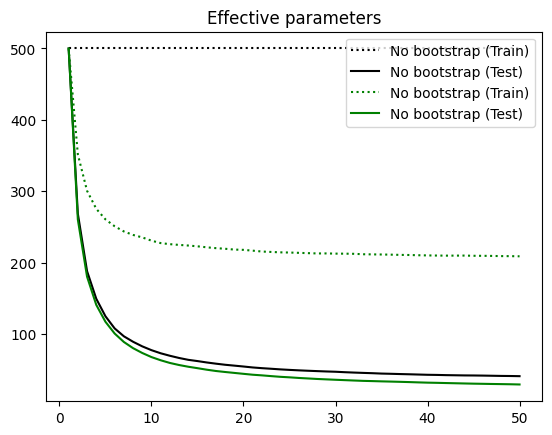

In [20]:
res_mean = res.groupby(['bootstrap', 'n_estimators'])[['mse_test', 'ep_train', 'ep_test']].mean().reset_index()

plt.plot(res_mean[res_mean['bootstrap']== False]['n_estimators'], res_mean[res_mean['bootstrap']== False]['ep_train'], color='black', ls='dotted', label='No bootstrap (Train)')
plt.plot(res_mean[res_mean['bootstrap']== False]['n_estimators'], res_mean[res_mean['bootstrap']== False]['ep_test'], color='black', label='No bootstrap (Test)')

plt.plot(res_mean[res_mean['bootstrap']== True]['n_estimators'], res_mean[res_mean['bootstrap']== True]['ep_train'], color='green', ls='dotted', label='No bootstrap (Train)')
plt.plot(res_mean[res_mean['bootstrap']== True]['n_estimators'], res_mean[res_mean['bootstrap']== True]['ep_test'], color='green', label='No bootstrap (Test)')

plt.title('Effective parameters')
plt.legend()


In [16]:
# effect of boostrapping (fig 8)
configs = [{'bootstrap': True, 'n_estimators': 50, 'max_leaf_nodes':500, 'max_features': x} for x in features]
res = run_simulated_experiments('bootstrap_effect', configs, n_reps=3)

Running forest experiment with seed 1, n_estimators 50, max features 1.0, bootstrap True and max_leaf_nodes 500.
Running forest experiment with seed 1, n_estimators 50, max features 0.8, bootstrap True and max_leaf_nodes 500.
Running forest experiment with seed 1, n_estimators 50, max features 0.6, bootstrap True and max_leaf_nodes 500.
Running forest experiment with seed 1, n_estimators 50, max features 0.4, bootstrap True and max_leaf_nodes 500.
Running forest experiment with seed 1, n_estimators 50, max features 0.2, bootstrap True and max_leaf_nodes 500.
Running forest experiment with seed 2, n_estimators 50, max features 1.0, bootstrap True and max_leaf_nodes 500.
Running forest experiment with seed 2, n_estimators 50, max features 0.8, bootstrap True and max_leaf_nodes 500.
Running forest experiment with seed 2, n_estimators 50, max features 0.6, bootstrap True and max_leaf_nodes 500.
Running forest experiment with seed 2, n_estimators 50, max features 0.4, bootstrap True and max

Text(0.5, 1.0, 'EP Gap')

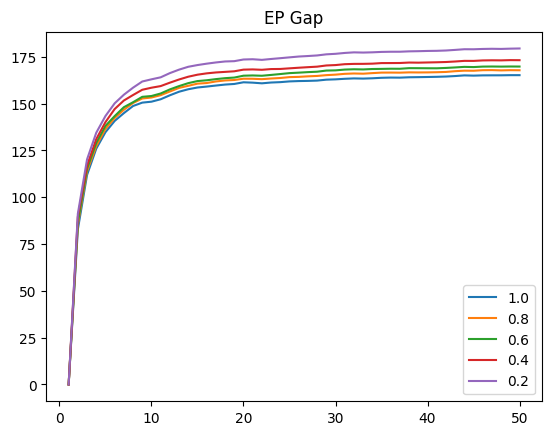

In [17]:
res_mean = res.groupby(['max_features', 'n_estimators'])[['mse_test', 'ep_train', 'ep_test']].mean().reset_index()

for f in features:
    res_sel = res_mean[res_mean['max_features']==f]
    plt.plot(res_sel['n_estimators'],  res_sel['ep_train'] - res_sel['ep_test'], label=f'{f}')
plt.legend()
plt.title('EP Gap')


# Section 4

In [12]:
# outcome variance figure (Fig 10)
# effect of boostrapping (Fig 7)
configs = [{'bootstrap': True, 'n_estimators': 50, 'max_leaf_nodes':500, 'max_features': 1/3},
            {'bootstrap': False, 'n_estimators': 50, 'max_leaf_nodes':500, 'max_features': 1/3}]
res = run_simulated_experiments('variance_effect', configs, n_reps=3, sigma=0)
res = run_simulated_experiments('variance_effect', configs, n_reps=3, sigma=1)
res = run_simulated_experiments('variance_effect', configs, n_reps=3, sigma=2)


Running forest experiment with seed 1, n_estimators 50, max features 0.3333333333333333, bootstrap True and max_leaf_nodes 500.
Running forest experiment with seed 1, n_estimators 50, max features 0.3333333333333333, bootstrap False and max_leaf_nodes 500.
Running forest experiment with seed 2, n_estimators 50, max features 0.3333333333333333, bootstrap True and max_leaf_nodes 500.
Running forest experiment with seed 2, n_estimators 50, max features 0.3333333333333333, bootstrap False and max_leaf_nodes 500.
Running forest experiment with seed 3, n_estimators 50, max features 0.3333333333333333, bootstrap True and max_leaf_nodes 500.
Running forest experiment with seed 3, n_estimators 50, max features 0.3333333333333333, bootstrap False and max_leaf_nodes 500.
Running forest experiment with seed 1, n_estimators 50, max features 0.3333333333333333, bootstrap True and max_leaf_nodes 500.
Running forest experiment with seed 1, n_estimators 50, max features 0.3333333333333333, bootstrap Fa

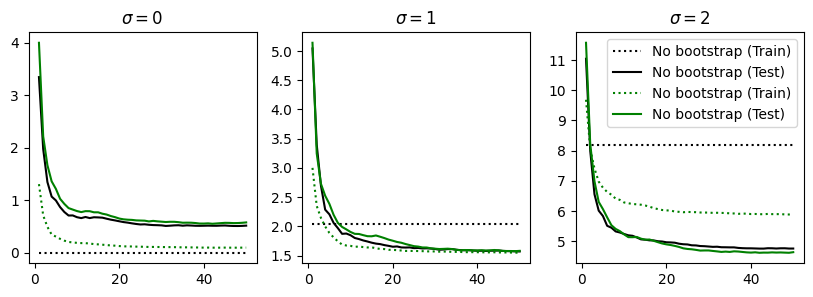

In [16]:
res = pd.read_csv('results/variance_effect.csv')
res_mean_all = res.groupby(['bootstrap', 'n_estimators', 'sigma'])[['mse_test', 'mse_train_resamp', 'ep_train', 'ep_test']].mean().reset_index()

plt.figure(figsize=(10, 3))
plt.subplot(1, 3, 1)
res_mean= res_mean_all[res_mean_all['sigma']==0]
plt.plot(res_mean[res_mean['bootstrap']== False]['n_estimators'], res_mean[res_mean['bootstrap']== False]['mse_train_resamp'], color='black', ls='dotted', label='No bootstrap (Train)')
plt.plot(res_mean[res_mean['bootstrap']== False]['n_estimators'], res_mean[res_mean['bootstrap']== False]['mse_test'], color='black', label='No bootstrap (Test)')

plt.plot(res_mean[res_mean['bootstrap']== True]['n_estimators'], res_mean[res_mean['bootstrap']== True]['mse_train_resamp'], color='green', ls='dotted', label='No bootstrap (Train)')
plt.plot(res_mean[res_mean['bootstrap']== True]['n_estimators'], res_mean[res_mean['bootstrap']== True]['mse_test'], color='green', label='No bootstrap (Test)')
plt.title(r'$\sigma=0$')

plt.subplot(1, 3, 2)
res_mean= res_mean_all[res_mean_all['sigma']==1]
plt.plot(res_mean[res_mean['bootstrap']== False]['n_estimators'], res_mean[res_mean['bootstrap']== False]['mse_train_resamp'], color='black', ls='dotted', label='No bootstrap (Train)')
plt.plot(res_mean[res_mean['bootstrap']== False]['n_estimators'], res_mean[res_mean['bootstrap']== False]['mse_test'], color='black', label='No bootstrap (Test)')

plt.plot(res_mean[res_mean['bootstrap']== True]['n_estimators'], res_mean[res_mean['bootstrap']== True]['mse_train_resamp'], color='green', ls='dotted', label='No bootstrap (Train)')
plt.plot(res_mean[res_mean['bootstrap']== True]['n_estimators'], res_mean[res_mean['bootstrap']== True]['mse_test'], color='green', label='No bootstrap (Test)')
plt.title(r'$\sigma=1$')

plt.subplot(1, 3, 3)
res_mean= res_mean_all[res_mean_all['sigma']==2]
plt.plot(res_mean[res_mean['bootstrap']== False]['n_estimators'], res_mean[res_mean['bootstrap']== False]['mse_train_resamp'], color='black', ls='dotted', label='No bootstrap (Train)')
plt.plot(res_mean[res_mean['bootstrap']== False]['n_estimators'], res_mean[res_mean['bootstrap']== False]['mse_test'], color='black', label='No bootstrap (Test)')

plt.plot(res_mean[res_mean['bootstrap']== True]['n_estimators'], res_mean[res_mean['bootstrap']== True]['mse_train_resamp'], color='green', ls='dotted', label='No bootstrap (Train)')
plt.plot(res_mean[res_mean['bootstrap']== True]['n_estimators'], res_mean[res_mean['bootstrap']== True]['mse_test'], color='green', label='No bootstrap (Test)')
plt.title(r'$\sigma=2$')
plt.legend()


In [8]:
# offsets figures (fig 11 and 12)
configs=[{'bootstrap': False, 'n_estimators': 50, 'max_leaf_nodes':500, 'max_features': x} for x in features]

res = run_simulated_experiments('offsets', configs, n_reps=3, offsets=[0, 0.05, .1, .2, .3])

Running forest experiment with seed 1, n_estimators 50, max features 1.0, bootstrap False and max_leaf_nodes 500.
Running forest experiment with seed 1, n_estimators 50, max features 0.8, bootstrap False and max_leaf_nodes 500.
Running forest experiment with seed 1, n_estimators 50, max features 0.6, bootstrap False and max_leaf_nodes 500.
Running forest experiment with seed 1, n_estimators 50, max features 0.4, bootstrap False and max_leaf_nodes 500.
Running forest experiment with seed 1, n_estimators 50, max features 0.2, bootstrap False and max_leaf_nodes 500.
Running forest experiment with seed 1, n_estimators 50, max features 1.0, bootstrap False and max_leaf_nodes 500.
Running forest experiment with seed 1, n_estimators 50, max features 0.8, bootstrap False and max_leaf_nodes 500.
Running forest experiment with seed 1, n_estimators 50, max features 0.6, bootstrap False and max_leaf_nodes 500.
Running forest experiment with seed 1, n_estimators 50, max features 0.4, bootstrap Fals

Text(0.5, 1.0, 'Squared error (test)')

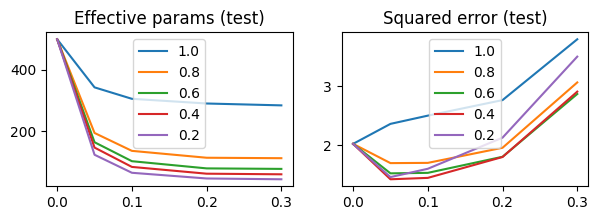

In [11]:
res_mean = res.groupby(['max_features', 'n_estimators', 'offset'])[['mse_test', 'ep_train', 'ep_test']].mean().reset_index()

res_mean = res_mean[res_mean['n_estimators']==50]
plt.figure(figsize=(7, 2))
plt.subplot(1, 2, 1)
for f in features:
    res_sel = res_mean[res_mean['max_features']==f]
    plt.plot(res_sel['offset'], res_sel['ep_test'], label=f'{f}')
plt.legend()
plt.title('Effective params (test)')

plt.subplot(1, 2, 2)
for f in features:
    res_sel = res_mean[res_mean['max_features']==f]
    plt.plot(res_sel['offset'], res_sel['mse_test'], label=f'{f}')
plt.legend()
plt.title('Squared error (test)')

In [7]:
# error decomposition figure
# offsets figures (fig 11 and 12)
configs=[{'bootstrap': False, 'n_estimators': 50, 'max_leaf_nodes':500, 'max_features': x} for x in features]

res = run_error_decomp_experiments('decomp_experiment', configs, n_reps=10, offsets=[ .1], n_seeds=2, sigma=0)

Running experiment with seed 1 version 0, bootstrap False, n_estimators 50, max_features 1.0 and max_leaf_nodes 500.


Running experiment with seed 1 version 1, bootstrap False, n_estimators 50, max_features 1.0 and max_leaf_nodes 500.
Running experiment with seed 1 version 2, bootstrap False, n_estimators 50, max_features 1.0 and max_leaf_nodes 500.
Running experiment with seed 1 version 3, bootstrap False, n_estimators 50, max_features 1.0 and max_leaf_nodes 500.
Running experiment with seed 1 version 4, bootstrap False, n_estimators 50, max_features 1.0 and max_leaf_nodes 500.
Running experiment with seed 1 version 5, bootstrap False, n_estimators 50, max_features 1.0 and max_leaf_nodes 500.
Running experiment with seed 1 version 6, bootstrap False, n_estimators 50, max_features 1.0 and max_leaf_nodes 500.
Running experiment with seed 1 version 7, bootstrap False, n_estimators 50, max_features 1.0 and max_leaf_nodes 500.
Running experiment with seed 1 version 8, bootstrap False, n_estimators 50, max_features 1.0 and max_leaf_nodes 500.
Running experiment with seed 1 version 9, bootstrap False, n_est

Text(0.5, 1.0, 'ModVar')

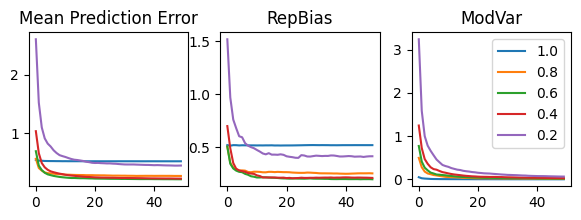

In [8]:
res_mean = res.groupby(['max_features', 'n_estimators'])[[ 'avg_mse', 'repbias', 'modvar']].mean().reset_index()

plt.figure(figsize=(7, 2))
plt.subplot(1, 3, 1)
for f in features:
    res_sel = res_mean[res_mean['max_features']==f]
    plt.plot(res_sel['n_estimators'], res_sel['avg_mse'], label=f'{f}')
plt.title('Mean Prediction Error')

plt.subplot(1, 3, 2)
for f in features:
    res_sel = res_mean[res_mean['max_features']==f]
    plt.plot(res_sel['n_estimators'], res_sel['repbias'], label=f'{f}')
plt.title('RepBias')

plt.subplot(1, 3, 3)
for f in features:
    res_sel = res_mean[res_mean['max_features']==f]
    plt.plot(res_sel['n_estimators'], res_sel['modvar'], label=f'{f}')
plt.legend()
plt.title('ModVar')